# <font color="#0000a0">Projet 6 : Effectuez une prédiction de revenus</font>

##  <font color="#0000a0">Objectif projet : proposer une régression linéaire avec 3 variables pour expliquer le revenu de l'enfant:</font>

- le revenu de l'enfant :  y_child ou ln_y_child

**3 viariables :**
- le revenu moyen du pays dans lequel habite le prospect : gdp ppp ou ln_gdpppp
- l'indice de Gini calculé sur les revenus des habitants du pays en question : gini
- le revenu des parents : y_parent ou ln_y_parent


## <font color="#0000a0">Dans ce notebook :</font>
1. Attribution d'une classe parent à chaque enfant 
2. ANOVA sur la variable revenus des enfants en fonction du pays
3. Régression linéaire 1 (2 variables explicatives : revenu moyen et indice de gini)
4. Régression linéaire 2 (3 variables explicatives : revenu moyen, indice de gini, classe des parents)
5. Décomposition de la variance
6. Réponses aux questions

In [2]:
import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json


Bad key "text.kerning_factor" on line 4 in
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Import du dataframe
df = pd.read_excel('output/df3.xlsx', sheet_name='Sheet1')
del df['Unnamed: 0']
df = df.sort_values(by=['country','quantile'])
df

,country,year_survey,quantile,income,gdpppp,country_name,gini,IGEincome
0,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874
1,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874
2,ALB,2008,3,1010.91600,7297.0,Albanie,30.462429,0.815874
3,ALB,2008,4,1086.90780,7297.0,Albanie,30.462429,0.815874
4,ALB,2008,5,1132.69970,7297.0,Albanie,30.462429,0.815874
...,...,...,...,...,...,...,...,...
11494,ZAF,2008,96,24553.56800,9602.0,Afrique du Sud,66.977850,0.677000
11495,ZAF,2008,97,28858.03100,9602.0,Afrique du Sud,66.977850,0.677000
11496,ZAF,2008,98,35750.29000,9602.0,Afrique du Sud,66.977850,0.677000
11497,ZAF,2008,99,46297.31600,9602.0,Afrique du Sud,66.977850,0.677000


## <font color="#0000a0">1. Attribution d'une classe parent à chaque enfant </font>

### Clonage de 1000 individus


In [4]:
df_try = df.append([df]*999,ignore_index=True)
df_try

,country,year_survey,quantile,income,gdpppp,country_name,gini,IGEincome
0,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874
1,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874
2,ALB,2008,3,1010.91600,7297.0,Albanie,30.462429,0.815874
3,ALB,2008,4,1086.90780,7297.0,Albanie,30.462429,0.815874
4,ALB,2008,5,1132.69970,7297.0,Albanie,30.462429,0.815874
...,...,...,...,...,...,...,...,...
11599995,ZAF,2008,96,24553.56800,9602.0,Afrique du Sud,66.977850,0.677000
11599996,ZAF,2008,97,28858.03100,9602.0,Afrique du Sud,66.977850,0.677000
11599997,ZAF,2008,98,35750.29000,9602.0,Afrique du Sud,66.977850,0.677000
11599998,ZAF,2008,99,46297.31600,9602.0,Afrique du Sud,66.977850,0.677000


### Initialisation d'une classe parent à 1

In [5]:
df_try['c_parent'] = 1
df_try

,country,year_survey,quantile,income,gdpppp,country_name,gini,IGEincome,c_parent
0,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1
1,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874,1
2,ALB,2008,3,1010.91600,7297.0,Albanie,30.462429,0.815874,1
3,ALB,2008,4,1086.90780,7297.0,Albanie,30.462429,0.815874,1
4,ALB,2008,5,1132.69970,7297.0,Albanie,30.462429,0.815874,1
...,...,...,...,...,...,...,...,...,...
11599995,ZAF,2008,96,24553.56800,9602.0,Afrique du Sud,66.977850,0.677000,1
11599996,ZAF,2008,97,28858.03100,9602.0,Afrique du Sud,66.977850,0.677000,1
11599997,ZAF,2008,98,35750.29000,9602.0,Afrique du Sud,66.977850,0.677000,1
11599998,ZAF,2008,99,46297.31600,9602.0,Afrique du Sud,66.977850,0.677000,1


In [6]:
# Nouveau new_df avec seulement pays et IGE income pour les distributions conditionnelles
df_new = df[['country','IGEincome']].drop_duplicates()
df_new

,country,IGEincome
0,ALB,0.815874
100,ARG,0.500000
200,ARM,0.400000
300,AUT,0.245267
400,AZE,0.500000
...,...,...
10999,VEN,0.500000
11099,VNM,0.480000
5800,XKX,0.400000
11299,YEM,0.500000


### Fonctions nécessaires à la génération des distibutions conditionnelles

In [7]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    plt.gcf().set_size_inches(15, 10)
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

### Calcul des distibutions conditionnelles pour chaque pays 

In [8]:
# Distribution conditionnelles pour les 116 pays, 100 quantiles et 1000 individus
#cd_country = {}
#for idx, row in df_new.iterrows() :
    #pj = row['IGEincome']
    #nb_quantiles = 100       # nombre de quantiles
    #n  = 1000*nb_quantiles   # taille de l'échantillon 1000 * 10 

    #y_child, y_parents = generate_incomes(n, pj) 
    #sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    #cd = conditional_distributions(sample, nb_quantiles) 

    #cd_country[row['country']] = cd.tolist()

### Stockage des distributions conditionnelles dans fichier JSON

In [9]:
#with open("cd_country.json", "w") as file:
    #json.dump(cd_country, file)

### Passage du fichier JSON en dictionnaire

In [10]:
# mettre les distributions conditionnelles dans variable cd
with open('cd_country.json', 'r') as f:
    cd = json.load(f) 

In [11]:
type(cd)

dict

### Calcul du nombre de classe parents pour chaque classe enfant 

In [12]:
c_parent = []
for country,value in cd.items():
    for c_enfant in value:
        for idx,col in enumerate(c_enfant):
            n = int(col*1000)
            c_parent += [idx+1] * n       
len(c_parent)

11600000

### Attribution de ces classes parents dans le dataframe

In [13]:
df_try.sort_values(['country','quantile'], ascending = True)

,country,year_survey,quantile,income,gdpppp,country_name,gini,IGEincome,c_parent
0,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1
11600,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1
23200,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1
34800,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1
46400,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1
...,...,...,...,...,...,...,...,...,...
11553599,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,1
11565199,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,1
11576799,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,1
11588399,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,1


In [14]:
# Imputation des classes parents
df_try = df_try.sort_values(['country','quantile'], ascending = True)
df_try['c_parent'] = c_parent

In [15]:
# renommer quantile par c_child
# renommer income par y_chil
# créer une merge ancien tableau avec la sélection (country,income,quantile)

df_try.loc[df_try['quantile'] == 2]

,country,year_survey,quantile,income,gdpppp,country_name,gini,IGEincome,c_parent
1,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874,1
11601,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874,1
23201,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874,1
34801,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874,1
46401,ALB,2008,2,916.66235,7297.0,Albanie,30.462429,0.815874,1
...,...,...,...,...,...,...,...,...,...
11553501,ZAF,2008,2,138.34155,9602.0,Afrique du Sud,66.977850,0.677000,83
11565101,ZAF,2008,2,138.34155,9602.0,Afrique du Sud,66.977850,0.677000,88
11576701,ZAF,2008,2,138.34155,9602.0,Afrique du Sud,66.977850,0.677000,92
11588301,ZAF,2008,2,138.34155,9602.0,Afrique du Sud,66.977850,0.677000,94


In [18]:
qunatile_merged = df_try[['country','quantile','income']].drop_duplicates()
qunatile_merged.rename(columns={'quantile':'c_parent'}, inplace=True)
qunatile_merged

,country,c_parent,income
0,ALB,1,728.89795
1,ALB,2,916.66235
2,ALB,3,1010.91600
3,ALB,4,1086.90780
4,ALB,5,1132.69970
...,...,...,...
11595,ZAF,96,24553.56800
11596,ZAF,97,28858.03100
11597,ZAF,98,35750.29000
11598,ZAF,99,46297.31600


In [22]:
C = df_try.sort_values(['country','c_parent'])

In [24]:
data = pd.merge(C,qunatile_merged, on =['country','c_parent'], how = 'left')

In [28]:
data.rename(columns={'quantile':'c_child','income_x':'y_child','income_y':'y_parent' }, inplace=True)

In [53]:
data

,country,year_survey,c_child,y_child,gdpppp,country_name,gini,IGEincome,c_parent,y_parent
0,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795
1,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795
2,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795
3,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795
4,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795
...,...,...,...,...,...,...,...,...,...,...
11599995,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000
11599996,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000
11599997,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000
11599998,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000


In [30]:
# Enregistrement du fichier
data.to_csv('data.csv', index=False)

In [96]:
#pd.read_csv('df_try_final.csv')

## <font color="#0000a0">2. ANOVA de la variable revenu enfant en fonction du pays</font>


In [95]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels import regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy
import scipy.stats as st
from scipy.stats import t, shapiro, ks_2samp

## Hypothèses générales

**H0: Tous les pays ont le même revenu**: Le pays n'a pas d'influence sur le revenu enfant moyen, c'est à dire que les moyennes des revenus enfant sont égales.

**H1: Les revenus dépendent du pays**: Le pays a une influence sur le revenu, c'est à dire que les moyennes des revenus enfants sont significativement différentes.

## Analyses graphiques

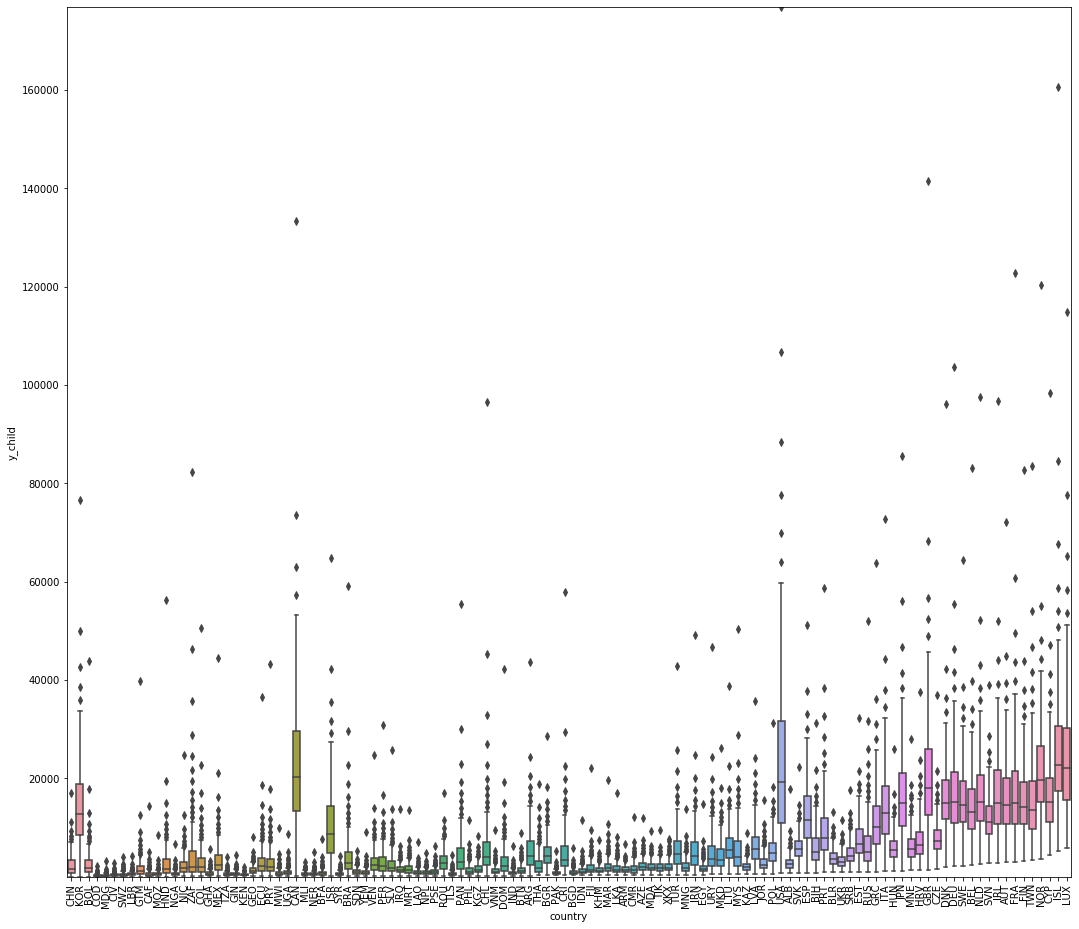

In [97]:
## Appercu dela distribution des revenus enfants par boxplot (116 pays)

data_mean = data[['country','y_child']].drop_duplicates().sort_values(by ='y_child', ascending = True)

# sns boxplots
f, ax = plt.subplots(figsize=(18, 16))
fig = sns.boxplot(x=data_mean['country'], y=data_mean['y_child'], data=data_mean)
fig.axis(ymin=data_mean['y_child'].min(), ymax=data_mean['y_child'].max())
plt.xticks(rotation=90);

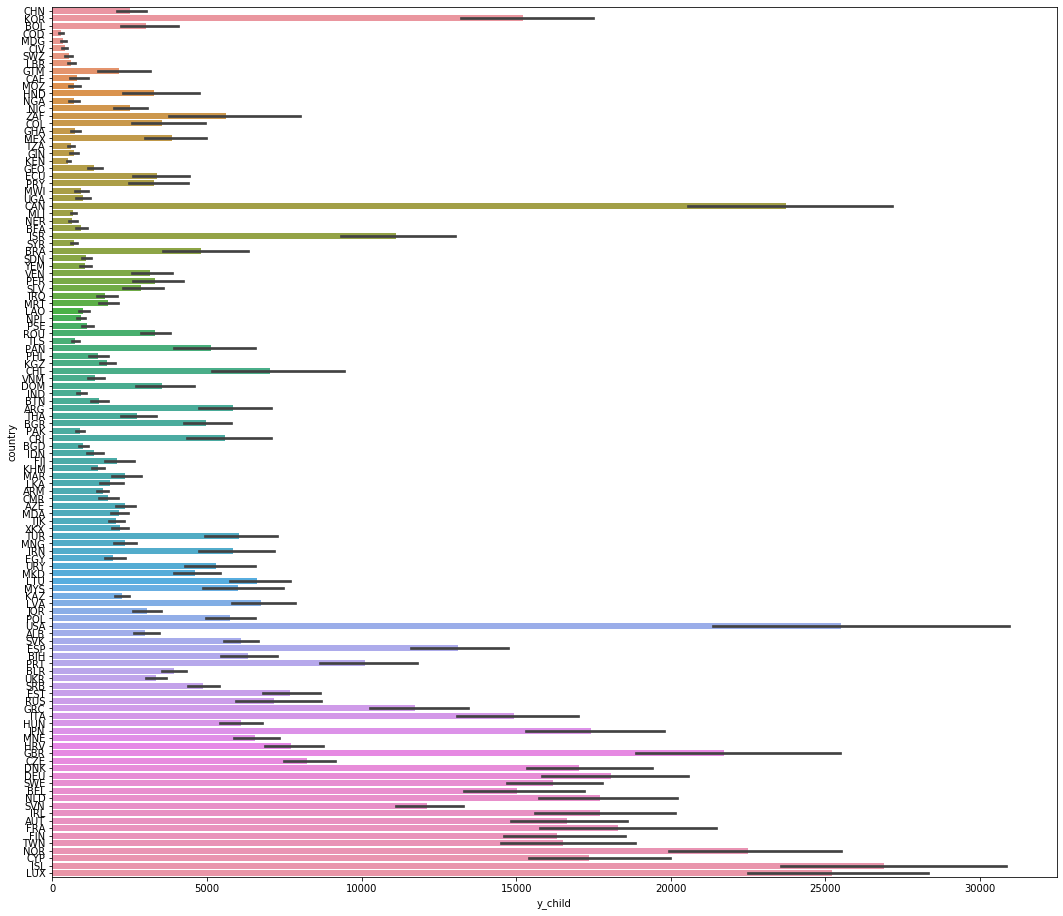

In [98]:
# Visualisation des moyennes revenus enfant pour les 116 pays
f, ax = plt.subplots(figsize=(18, 16))
sns.barplot(x=data_mean['y_child'], y=data_mean['country'], data = data_mean.sort_values(by ='y_child', ascending = True) )

In [101]:
data_mean.sort_values(by ='y_child', ascending = True)

,country,y_child
1700000,CHN,16.719418
5800000,KOR,17.317732
1100000,BOL,20.584948
2000000,COD,29.364283
6700000,MDG,29.411367
...,...,...
3400999,FRA,122775.164000
1501999,CAN,133454.840000
3501999,GBR,141565.230000
4900998,ISL,160645.270000


In [103]:
moyenne_globale = data_mean.mean()
print("La moyenne globale est de {}".format(moyenne_globale))

La moyenne globale est de y_child    6069.121925
dtype: float64


#### A vue d'oeil, il semblerait que ces moyennes ne soient pas homogènes mais nous allons vérifier cela avec une ANOVA.

## Préparation des données et ANOVA

In [31]:
# Préparation des données à l'ANOVA
anova1 = data.groupby(['country','c_child']).mean()
anova1.reset_index(inplace = True)

In [34]:
# Application de l'ANOVA
anova_pays = smf.ols('y_child ~ country', data=anova1).fit(alpha=0.05)
anova_pays.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_child   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     98.43
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        22:10:54   Log-Likelihood:            -1.1862e+05
No. Observations:               11600   AIC:                         2.375e+05
Df Residuals:                   11484   BIC:                         2.383e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2994.8299    671.390      4.461      0.000    1678.790    4310.870
country[T.ARG]  2853.0548    949.489      3.005      0.003     991.893    4714.216
country[T.ARM] -1366.4471    949.489     -1.439      0.150   -3227.608     494.714
country[T.AUT]  1.364e+04    949.489     14.369      0.000    1.18e+04    1.55e+04
country[T.AZE]  -637.4009    949.489     -0.671      0.502   -2498.562    1223.760
country[T.BEL]  1.203e+04    949.489     12.670      0.000    1.02e+04    1.39e+04
country[T.BFA] -2076.8772    949.489     -2.187      0.029   -3938.039    -215.716
country[T.BGD] -1996.1375    949.489     -2.102      0.036   -3857.299    -134.976
country[T.BGR]  1990.1487    949.489      2.096      0.036     128.987    3851.310
country[T.BIH]  3339.8574    949.489      3.518      0.000    1478.696    5201.019
country[T.BLR]   926.3336    949.489      0.976      0.329    -934.828    2787.495
country[T.BOL]    21.4339    949.489      0.023      0.982   -1839.727    1882.595
country[T.BRA]  1812.6547    949.489      1.909      0.056     -48.507    3673.816
country[T.BTN] -1478.9008    949.489     -1.558      0.119   -3340.062     382.260
country[T.CAF] -2183.5300    949.489     -2.300      0.021   -4044.691    -322.369
country[T.CAN]  2.074e+04    949.489     21.848      0.000    1.89e+04    2.26e+04
country[T.CHL]  4056.7801    949.489      4.273      0.000    2195.619    5917.941
country[T.CHN]  -472.0712    949.489     -0.497      0.619   -2333.232    1389.090
country[T.CIV] -2594.9947    949.489     -2.733      0.006   -4456.156    -733.833
country[T.CMR] -1200.3359    949.489     -1.264      0.206   -3061.497     660.825
country[T.COD] -2718.8139    949.489     -2.863      0.004   -4579.975    -857.653
country[T.COL]   552.1754    949.489      0.582      0.561   -1308.986    2413.337
country[T.CRI]  2585.5567    949.489      2.723      0.006     724.395    4446.718
country[T.CYP]  1.435e+04    949.489     15.114      0.000    1.25e+04    1.62e+04
country[T.CZE]  5240.4635    949.489      5.519      0.000    3379.302    7101.625
country[T.DEU]  1.507e+04    949.489     15.868      0.000    1.32e+04    1.69e+04
country[T.DNK]  1.405e+04    949.489     14.796      0.000    1.22e+04    1.59e+04
country[T.DOM]   563.5722    949.489      0.594      0.553   -1297.589    2424.733
country[T.ECU]   388.9111    949.489      0.410      0.682   -1472.250    2250.072
country[T.EGY] -1025.2525    949.489     -1.080      0.280   -2886.414     835.909
country[T.ESP]  1.012e+04    949.489     10.661      0.000    8261.002     1.2e+04
country[T.EST]  4707.2327    949.489      4.958      0.000    2846.071    6568.394
country[T.FIN]  1.331e+04    949.489     14.020      0.000    1.15e+04    1.52e+04
country[T.FJI]  -896.0990    949.489     -0.944      0.345   -2757.260     965.062
country[T.FR

## Test de siginificativité et conclusion

- La variable pays explique près de 50% de la variance du revenu
- Les autres facteurs non considérés dans le modèle expliquent l'autre moitié de la variance du revenu




- La p-valeur du Test de Fischer est nulle, donc inférieure au seuil de 5%
- On rejette donc l'hypothèse H0 et on conclut que le pays a une influence sur le revenu

## Hypothèses à vérifier pour que l'ANOVA soit valide

1. Les résidus sont normalement distribués (c'est à dire qu'ils suivent une loi normale)
2. Les variances des K populations sont égales entre elles (hypothèse d'homoscédasticité)
3. Des échantillons aléatoires simple d'effectifs sont prélevés dans les populations indépendamment les unes des autres

En fait, même si les hypothèses du modèle linéaire ne sont pas respectées. La raison à cela, c'est que, comme on dit, le modèle linéaire est robuste, c'est-à-dire que sous réserve qu'il y ait une taille d'échantillon suffisante, les résultats du modèle linéaire restent valables. En termes matheux, on parle de propriétés asymptotiques (i.e. des propriétés valables si n, la taille d'échantillon "tend vers l'infini"...).

## Vérification de l'hypothèse gaussienne sur les résidus

**HO**: les résidus suivent une loi normale 

**H1**: les résidus ne suivent pas une loi normale


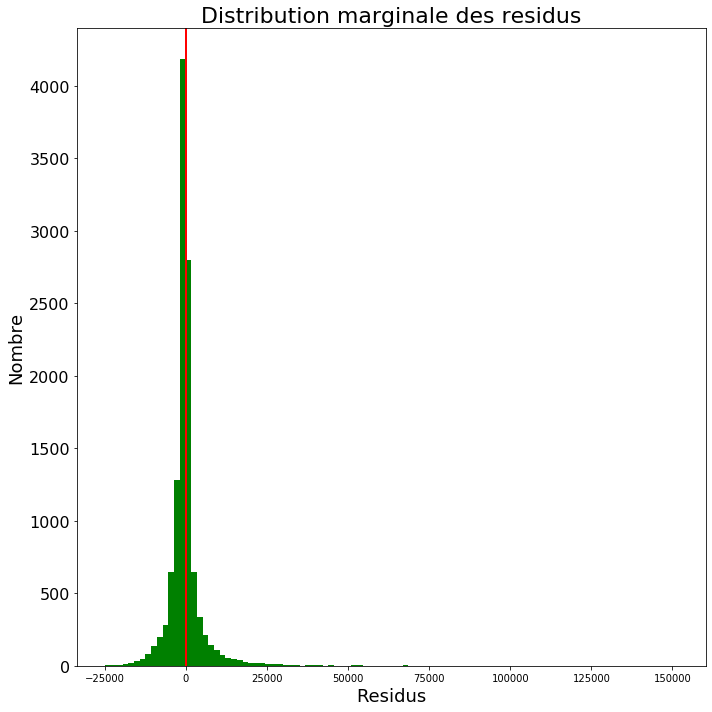

In [106]:
# Préparation des données
X = anova_pays.resid
Xbar = np.mean(X)
Xsprime = np.std(X)

#Représentation de la distribution marginale
plt.figure(figsize=(10,10))

plt.hist(X, 100, facecolor='g')
plt.axvline(Xbar, color='r', linewidth=2)

plt.title(f'Distribution marginale des residus', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Residus',fontsize=18)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.savefig('Graphiques/dist_marg_resid_anova.png')
plt.show()

In [107]:
# Test d'adequation à une loi (ici Normale) avec le test Kolmogorv-Smirnov
ks_2samp(X,list(np.random.normal(Xbar, Xsprime, 11600)))

Ks_2sampResult(statistic=0.2450862068965517, pvalue=4.934957943980121e-303)

#### La p-value est nulle, donc on rejette HO et on accepte H1, les résidus ne suivent pas une loi normale, observons le à travers la droite de Henry

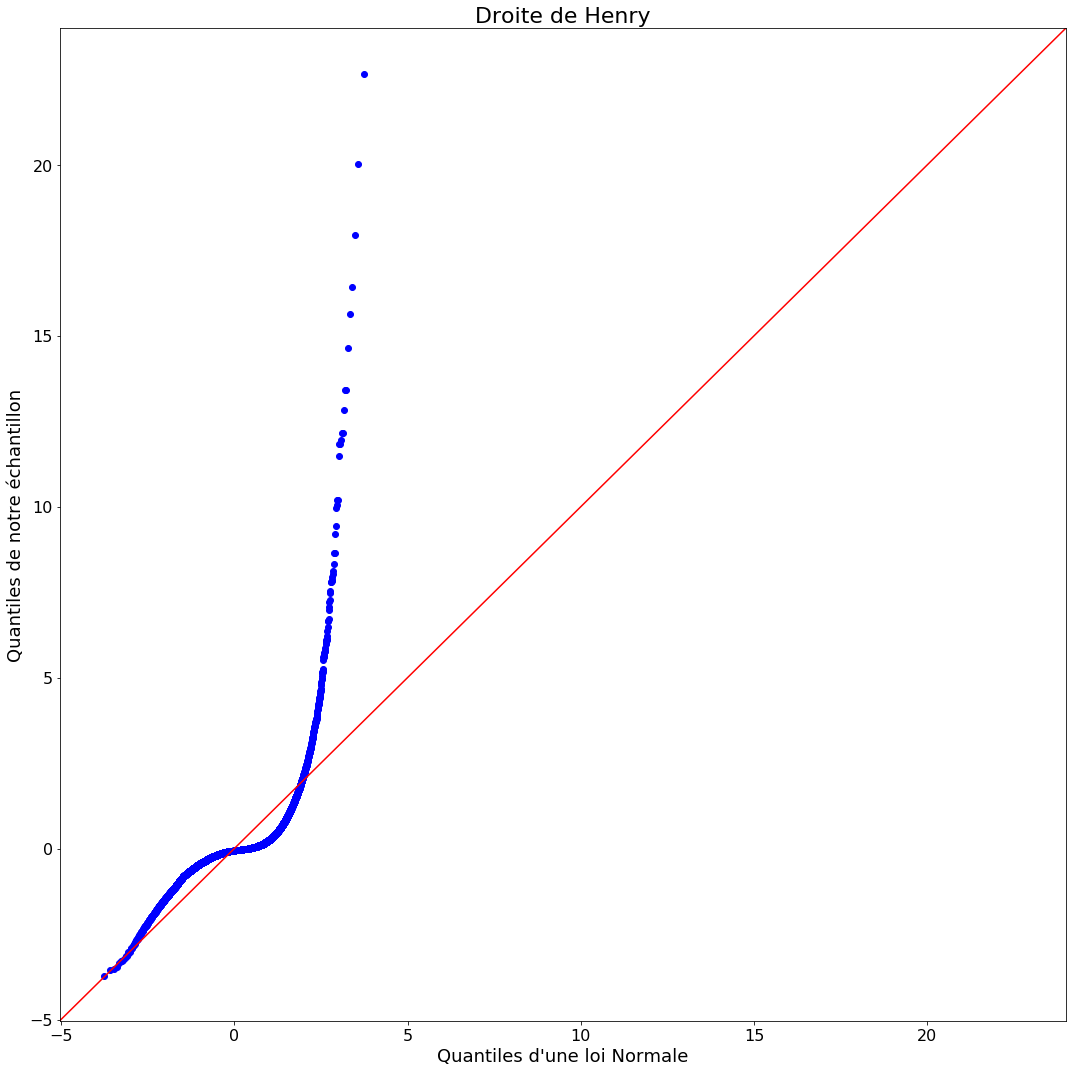

In [108]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(X, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Droite de Henry', fontsize=22)

plt.tight_layout()

plt.savefig('Graphiques/Droite_de_Henry_ANOVA.png')

plt.show()

#### A travers la droite de Henry, la distribution des résidus est davantage visible que sur l'histogramme, les hauts revenus moyens sont très étalés. Les petits revenus sont en nombre important et apparaisent très nettement dans l'histogramme.

## Homoscédasticité des résidus
Les résidus ont la même variance quel que soit le groupe considéré, ou quelle que soit la valeur de la variable explicative considérée.

Pour tester l'homoscédasticité on peut utiliser le test de Levene ou le test de Bartlett.

In [109]:
#Homoscédasticité : Test de Levene
levene, pvalue = st.levene(anova_pays.resid,anova_pays.y_child )
print("Levene : {}, pvalue : {}".format(levene, pvalue))

AttributeError: 'OLSResults' object has no attribute 'y_child'

## <font color="#0000a0">3. Régression linéaire 1 (2 variables explicatives : revenu moyen et indice de gini)</font>

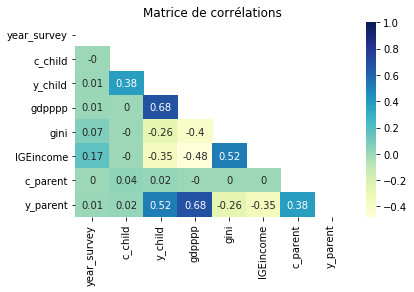

In [92]:
def plot_correlation_matrix(data):
    data_corr = data.corr()
    mask=np.triu(np.ones(data_corr.shape)).astype(np.bool)
    # create heatmap
    sns.heatmap(round(data_corr,2), annot=True, cmap="YlGnBu" ,fmt='g',mask =mask)
    ax.xaxis.set_label_position("bottom")
    plt.tight_layout()
    plt.title('Matrice de corrélations', y=1.1)
    plt.show()
    
plot_correlation_matrix(data_dd)

#### Il ne faut pas que des variables soient corrélées entre elles pour la régression multiple :
- gini et gdp ppp sont corrélés faiblement négativement.

- Notons que gdp ppp est corrélée positivement à y_child : nous attendons une coefficient positif pour gdp ppp dans l'équation
- Notons que gini est corrélé faiblement négativement à y_child : nous attendrons un coefficient négatif pour gini dans l'équation  
- Notons que y_parent est corrélé positive,ent à y_child, ce est logique (cf mission 3)

In [114]:
# Ajout de variables logarithmiques 
data['ln_y_child'] = np.log(data["y_child"])
data['ln_gdpppp'] = np.log(data["gdpppp"])
data['ln_y_parent'] = np.log(data["y_parent"])

data

,country,year_survey,c_child,y_child,gdpppp,country_name,gini,IGEincome,c_parent,y_parent,ln_y_child,ln_gdpppp,ln_y_parent
0,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795,6.591534,8.895219,6.591534
1,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795,6.591534,8.895219,6.591534
2,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795,6.591534,8.895219,6.591534
3,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795,6.591534,8.895219,6.591534
4,ALB,2008,1,728.89795,7297.0,Albanie,30.462429,0.815874,1,728.89795,6.591534,8.895219,6.591534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11599995,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000,11.319444,9.169727,11.319444
11599996,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000,11.319444,9.169727,11.319444
11599997,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000,11.319444,9.169727,11.319444
11599998,ZAF,2008,100,82408.55000,9602.0,Afrique du Sud,66.977850,0.677000,100,82408.55000,11.319444,9.169727,11.319444


In [65]:
data_dd = data.drop_duplicates()

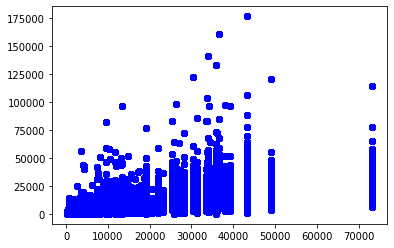

In [115]:
y=data["y_child"]
x1=data["gdpppp"]

plt.scatter(x1, y, color='blue')

### Option sans passage au logarithme

In [116]:
reg = smf.ols('y_child ~ gdpppp + gini', data=data)
reg_multi = reg.fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_child   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 4.702e+06
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        16:46:53   Log-Likelihood:            -1.1915e+08
No. Observations:            11600000   AIC:                         2.383e+08
Df Residuals:                11599997   BIC:                         2.383e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -656.7763     10.705    -61.350      0.000    -677.758    -635.794
gdpppp         0.4857      0.000   2843.721      0.000       0.485       0.486
gini          18.0278      0.250     72.049      0.000      17.537      18.518
==============================================================================
Omnibus:                 14341814.886   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3808752193.045
Skew:                           6.545   Prob(JB):                         0.00
Kurtosis:                      90.800   Cond. No.                     9.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
# Double vérification avec scikit learn
Y=data["y_child"]
X=data[["gdpppp","gini"]]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model=LinearRegression().fit(X_train,Y_train)
print('score:',model.score(X_test,Y_test))
print('coefficients:',model.coef_)
print('intercept:',model.intercept_)

score: 0.44645061206773995
coefficients: [ 0.48549631 17.81116058]
intercept: -647.3300584341432


### Option avec passage au logarithme


In [118]:
# Test global avec stat models
reg_log2 = smf.ols('ln_y_child ~ ln_gdpppp + gini', data=data)
reg_multi_log2 = reg_log2.fit()
reg_multi_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_y_child   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 1.087e+07
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        16:49:24   Log-Likelihood:            -1.4080e+07
No. Observations:            11600000   AIC:                         2.816e+07
Df Residuals:                11599997   BIC:                         2.816e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7843      0.002    334.806      0.000       0.780       0.789
ln_gdpppp      0.8658      0.000   4269.376      0.000       0.865       0.866
gini          -0.0149    2.8e-05   -531.250      0.000      -0.015      -0.015
==============================================================================
Omnibus:                   393604.807   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1069810.986
Skew:                          -0.102   Prob(JB):                         0.00
Kurtosis:                       4.474   Cond. No.                         392.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Double vérification avec un modéle avec scikit learn
Y=data["ln_y_child"]
X=data[["ln_gdpppp","gini"]]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model2=LinearRegression().fit(X_train,Y_train)
print('score:',model2.score(X_test,Y_test))
print('coefficients:',model2.coef_)
print('intercept:',model2.intercept_)


score: 0.6521971346419047
coefficients: [ 0.86584924 -0.01489547]
intercept: 0.7844520227078755


## <font color="#0000a0">4. Régression linéaire 2 (3 variables explicatives : revenu moyen, indice de gini et la classe des parents)</font>

### Option sans passage au logarithme

In [121]:
# Faire le test plutot avec le revenu du parent 
# La classe est très du dépendant du pays 
reg3 = smf.ols('y_child ~ gdpppp + gini + y_parent ', data=data)
reg_multi3 = reg3.fit()
reg_multi3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_child   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                 4.058e+06
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        16:53:17   Log-Likelihood:            -1.1844e+08
No. Observations:            11600000   AIC:                         2.369e+08
Df Residuals:                11599996   BIC:                         2.369e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -432.6232     10.064    -42.986      0.000    -452.349    -412.898
gdpppp         0.3200      0.000   1529.725      0.000       0.320       0.320
gini          11.8751      0.235     50.480      0.000      11.414      12.336
y_parent       0.3413      0.000   1236.654      0.000       0.341       0.342
==============================================================================
Omnibus:                 14227292.777   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4016403055.065
Skew:                           6.416   Prob(JB):                         0.00
Kurtosis:                      93.250   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Option avec passage au logarithme

In [122]:
reg4 = smf.ols('ln_y_child ~ ln_gdpppp + gini + ln_y_parent  ', data=data)
reg_multi4 = reg4.fit()
reg_multi4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_y_child   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.273e+07
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        16:54:47   Log-Likelihood:            -1.1754e+07
No. Observations:            11600000   AIC:                         2.351e+07
Df Residuals:                11599996   BIC:                         2.351e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3335      0.002    173.131      0.000       0.330       0.337
ln_gdpppp       0.3681      0.000   1383.426      0.000       0.368       0.369
gini           -0.0063   2.32e-05   -272.741      0.000      -0.006      -0.006
ln_y_parent     0.5748      0.000   2392.532      0.000       0.574       0.575
==============================================================================
Omnibus:                   544588.481   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1966239.692
Skew:                          -0.048   Prob(JB):                         0.00
Kurtosis:                       5.015   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color="#0000a0">5. Décomposition de la variance</font>

#### Modélè 1 : ln_y_chlid = A * ln_gdpppp + B * gini

In [135]:
anova_model1 = sm.stats.anova_lm(reg_multi_log2, typ=1)
anova_model1

,df,sum_sq,mean_sq,F,PR(>F)
ln_gdpppp,1.0,1.424120e+07,1.424120e+07,2.146381e+07,0.0
gini,1.0,1.872569e+05,1.872569e+05,2.822268e+05,0.0
Residual,11599997.0,7.696577e+06,6.634982e-01,NaN,NaN


In [141]:
variance_ln_gdpppp_m1 = round(anova_model1.sum_sq['ln_gdpppp'] *100 / anova_model1.sum_sq.sum(),2)
variance_gini_m1 = round(anova_model1.sum_sq['gini'] *100 / anova_model1.sum_sq.sum(),2)

print("La variable ln_gdpppp explique {} du modèle 1".format(variance_ln_gdpppp_m1))
print("La variable gini explique {} du modèle 1".format(variance_gini_m1))


La variable ln_gdpppp explique 64.37 du modèle 1
La variable gini explique 0.85 du modèle 1


In [140]:
anova_model2 = sm.stats.anova_lm(reg_multi4, typ=1)
anova_model2

,df,sum_sq,mean_sq,F,PR(>F)
ln_gdpppp,1.0,1.424120e+07,1.424120e+07,3.205548e+07,0.0
gini,1.0,1.872569e+05,1.872569e+05,4.214961e+05,0.0
ln_y_parent,1.0,2.543078e+06,2.543078e+06,5.724207e+06,0.0
Residual,11599996.0,5.153499e+06,4.442673e-01,NaN,NaN


In [142]:
variance_ln_gdpppp_m2 = round(anova_model2.sum_sq['ln_gdpppp'] *100 / anova_model2.sum_sq.sum(),2)
variance_gini_m2 = round(anova_model2.sum_sq['gini'] *100 / anova_model2.sum_sq.sum(),2)
variance_ln_y_parent_m2 = round(anova_model2.sum_sq['ln_y_parent'] *100 / anova_model2.sum_sq.sum(),2)


print("La variable ln_gdpppp explique {} du modèle 2".format(variance_ln_gdpppp_m2))
print("La variable gini explique {} du modèle 2".format(variance_gini_m2))
print("La variable ln_y_parent explique {} du modèle 2".format(variance_ln_y_parent_m2))

La variable ln_gdpppp explique 64.37 du modèle 2
La variable gini explique 0.85 du modèle 2
La variable ln_y_parent explique 11.49 du modèle 2


In [147]:
sm.stats.diagnostic.het_breuschpagan(reg_multi4.resid, reg_multi4.model.exog)

(463263.17774012237, 0.0, 160844.57217281018, 0.0)

## <font color="#0000a0">6. Réponses aux questions</font>